<a href="https://colab.research.google.com/github/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/blob/main/Financial_Forecasting_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Distributed ML for Banking Dataset

**Contribution -** Individual

**Name -** Satyam Kulkarni

# **GitHub Link**

Link - https://github.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier

# **1.Exploratory Data Analysis (EDA) with Spark**

### **Installing packages and libraries**

In [ ]:
# Install PySpark
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q pyspark

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
# Set up environment for Java
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Step 4: Initialize Spark session
spark = SparkSession.builder.appName("Bank Data").getOrCreate()

### **Data loading and basic inspection**

In [ ]:
# Load dataset
!wget https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv -O bank.csv

df = spark.read.csv("bank.csv", header=True, inferSchema=True)

df.show(5)  # Display the first 5 rows
df.printSchema()

--2024-10-07 14:25:12--  https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375542 (367K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 366.74K  --.-KB/s    in 0.05s   

2024-10-07 14:25:12 (7.77 MB/s) - ‘bank.csv’ saved [375542/375542]

+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---

In [ ]:
# Data description

df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|summary|               age|    job| marital|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|   y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+----+
|  count|              4521|   4521|    4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|4521|
|   mean| 41.17009511170095|   NULL|    NULL|     NULL|   NULL|1422.6578190665782|   NULL|NULL|    NULL|15.9152842291528

In [ ]:
# Print null values

from pyspark.sql.functions import col, sum

null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



### **Data Filtering and Column Operations**

In [ ]:
# Filter the dataset for clients with a balance greater than 1000

filtered_df = df.filter(col("balance") > 1000)

filtered_df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|  services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 39|  services|married|secondary|     no|   9374|    yes|  no| unknown| 20|  may|     273|      

In [ ]:
from pyspark.sql.functions import when, month
# Extract the month from the 'month' column and create a new column for the quarter of the year

quarter_df = filtered_df.withColumn(
    "quarter",
    when(month("month") <= 3, 1)
    .when((month("month") > 3) & (month("month") <= 6), 2)
    .when((month("month") > 6) & (month("month") <= 9), 3)
    .otherwise(4)
)

# Step 7: Show the first 5 rows of the new DataFrame
quarter_df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|quarter|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|      4|
| 33|  services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|      4|
| 35|management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|      4|
| 30|management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|      4|
| 39|  services|married|secondary|     no

### **GroupBy and Aggregation**

In [ ]:
from pyspark.sql import functions as F

# Group by job type and calculate average balance and median age
job_stats = df.groupBy("job").agg(
    F.avg("balance").alias("average_balance"),
    F.expr("percentile_approx(age, 0.5)").alias("median_age")  # Median age
)

job_stats.show()


+-------------+------------------+----------+
|          job|   average_balance|median_age|
+-------------+------------------+----------+
|   management|1766.9287925696594|        38|
|      retired| 2319.191304347826|        59|
|      unknown|1501.7105263157894|        49|
|self-employed|1392.4098360655737|        40|
|      student|1543.8214285714287|        26|
|  blue-collar| 1085.161733615222|        39|
| entrepreneur|          1645.125|        41|
|       admin.|  1226.73640167364|        38|
|   technician|     1330.99609375|        38|
|     services|1103.9568345323742|        37|
|    housemaid|2083.8035714285716|        49|
|   unemployed|       1089.421875|        41|
+-------------+------------------+----------+



In [ ]:
# Count the number of clients for each marital status who have subscribed to a term deposit
subscription_counts = df.groupBy("marital").agg(
    F.count(F.when(col("y") == "yes", 1)).alias("total_clients_subscribed")
)

subscription_counts.show()


+--------+------------------------+
| marital|total_clients_subscribed|
+--------+------------------------+
|divorced|                      77|
| married|                     277|
|  single|                     167|
+--------+------------------------+



### **Use UDF to Categorize Age Groups**

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the UDF
def categorize_age(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 65:
        return '25-65'
    else:
        return '>65'

# Register the UDF
age_group_udf = udf(categorize_age, StringType())

# Apply the UDF to create a new column 'age_group'
df_with_age_group = df.withColumn("age_group", age_group_udf(col("age")))

# Show the first 5 rows of the updated DataFrame
df_with_age_group.show(5)


+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|age_group|
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 30| unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|    25-65|
| 33|   services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|    25-65|
| 35| management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|    25-65|
| 30| management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|    25-65|
| 59|blue-collar|mar

### **Advanced Data Transformations**

In [ ]:
# Calculate the subscription rate (percentage of clients who subscribed to a term deposit) for each education level
subscription_rate = df.groupBy("education").agg(
    (F.count(F.when(col("y") == "yes", 1)) / F.count("*") * 100).alias("subscription_rate")
)

subscription_rate.show()


+---------+------------------+
|education| subscription_rate|
+---------+------------------+
|  unknown| 10.16042780748663|
| tertiary|14.296296296296296|
|secondary|10.624457935819601|
|  primary|  9.43952802359882|
+---------+------------------+



In [ ]:
# Calculate loan default rate for each profession (assumed that 'loan' indicates if a loan is defaulted)
loan_default_rate = df.groupBy("job").agg(
    (F.count(F.when(col("loan") == "yes", 1)) / F.count("*") * 100).alias("loan_default_rate")
)

# Get the top 3 professions with the highest loan default rate
top_3_professions = loan_default_rate.orderBy(col("loan_default_rate").desc()).limit(3)

top_3_professions.show()


+------------+------------------+
|         job| loan_default_rate|
+------------+------------------+
|entrepreneur|24.404761904761905|
|      admin.| 19.03765690376569|
|    services| 17.74580335731415|
+------------+------------------+



### **String Manipulation and Date Functions**

In [ ]:
# Concatenate 'job' and 'marital' columns into a new column 'job_marital'
df_with_job_marital = df.withColumn("job_marital", F.concat_ws("_", col("job"), col("marital")))

df_with_job_marital.show(5)


+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------------------+
|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|        job_marital|
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------------------+
| 30| unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no| unemployed_married|
| 33|   services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|   services_married|
| 35| management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|  management_single|
| 30| management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4

In [ ]:
# Use string functions to convert the 'contact' column to uppercase
df_with_upper_contact = df_with_job_marital.withColumn("contact", F.upper(col("contact")))

df_with_upper_contact.show(5)


+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------------------+
|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|        job_marital|
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-------------------+
| 30| unemployed|married|  primary|     no|   1787|     no|  no|CELLULAR| 19|  oct|      79|       1|   -1|       0| unknown| no| unemployed_married|
| 33|   services|married|secondary|     no|   4789|    yes| yes|CELLULAR| 11|  may|     220|       1|  339|       4| failure| no|   services_married|
| 35| management| single| tertiary|     no|   1350|    yes|  no|CELLULAR| 16|  apr|     185|       1|  330|       1| failure| no|  management_single|
| 30| management|married| tertiary|     no|   1476|    yes| yes| UNKNOWN|  3|  jun|     199|       4

### **Data Visualization**

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df_with_upper_contact.toPandas()


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


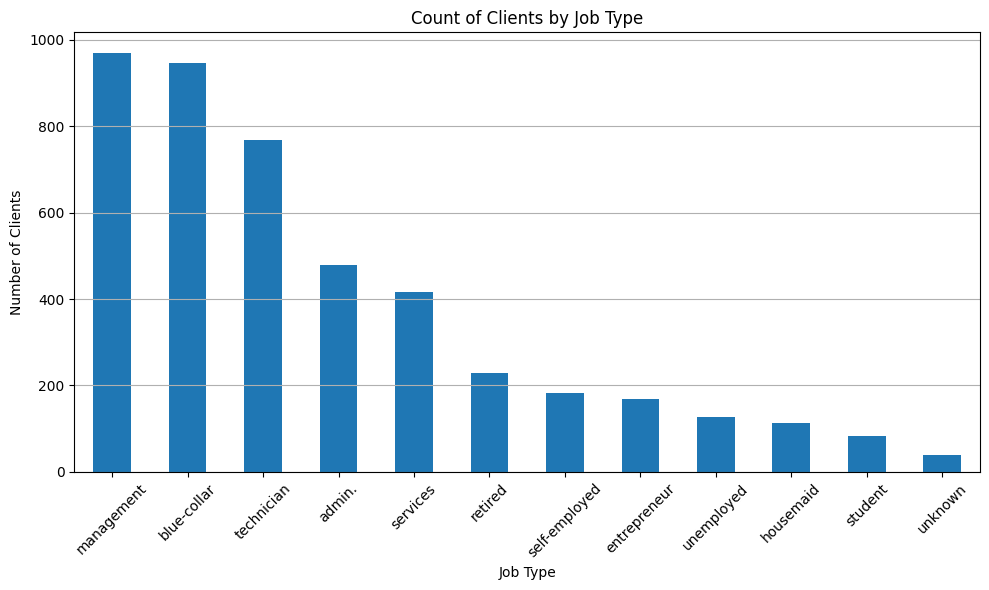

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot for the count of clients by job type
job_counts = pandas_df['job'].value_counts()
print(job_counts)

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Count of Clients by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Complex Queries for Insights**

In [ ]:
# 1. Determine which month has the highest number of clients contacted
month_contacted_counts = pandas_df['month'].value_counts().reset_index()
month_contacted_counts.columns = ['month', 'num_contacts']
month_contacted_counts = month_contacted_counts.sort_values(by='num_contacts', ascending=False)

month_with_max_contacts = month_contacted_counts.iloc[0]['month']

# 2. Calculate the success rate of the campaign in that month
month_df = pandas_df[pandas_df['month'] == month_with_max_contacts]
success_rate = month_df['y'].value_counts(normalize=True).get('yes', 0) * 100

# Show the month with the highest number of contacts and its success rate
print("Month Contacted Counts:")
print(month_contacted_counts)

print(f"\nSuccess Rate in {month_with_max_contacts}: {success_rate:.2f}%")

# Calculate success rate based on credit default status
success_rate_default = pandas_df[pandas_df['default'] == 'yes']['y'].value_counts(normalize=True).get('yes', 0) * 100
success_rate_non_default = pandas_df[pandas_df['default'] == 'no']['y'].value_counts(normalize=True).get('yes', 0) * 100

print(f"Success rate for clients with credit default: {success_rate_default:.2f}%")
print(f"Success rate for clients without credit default: {success_rate_non_default:.2f}%")



Month Contacted Counts:
   month  num_contacts
0    may          1398
1    jul           706
2    aug           633
3    jun           531
4    nov           389
5    apr           293
6    feb           222
7    jan           148
8    oct            80
9    sep            52
10   mar            49
11   dec            20

Success Rate in may: 6.65%
Success rate for clients with credit default: 11.84%
Success rate for clients without credit default: 11.52%


In [ ]:
# Calculate average duration of contact for clients who subscribed versus those who did not
average_duration = pandas_df.groupby('y')['duration'].mean().reset_index()

print("Average Duration of Contact:")
print(average_duration)


Average Duration of Contact:
     y    duration
0   no  226.347500
1  yes  552.742802


### **Correlation Between Age and Balance**

In [ ]:
# Calculate the correlation coefficient between 'age' and 'balance'
correlation = pandas_df['age'].corr(pandas_df['balance'])

print(f"Correlation coefficient between age and balance: {correlation:.4f}")


Correlation coefficient between age and balance: 0.0838


### **Exploring Loan Defaults**

In [ ]:
# Calculate the counts of clients with and without a credit default
default_counts = pandas_df['default'].value_counts(normalize=True)

print("Proportion of Clients with and without Credit Default:")
print(default_counts)


Proportion of Clients with and without Credit Default:
default
no     0.98319
yes    0.01681
Name: proportion, dtype: float64


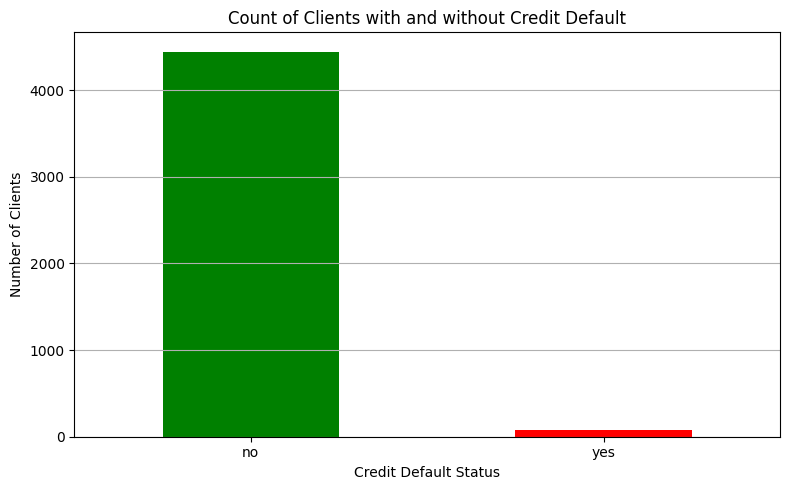

In [ ]:
# Visualize the counts of defaulters and non-defaulters
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(8, 5))
pandas_df['default'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Count of Clients with and without Credit Default')
plt.xlabel('Credit Default Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Contact Method Analysis**

Success Rates by Contact Method:
y          success_rate
contact                
CELLULAR      14.364641
TELEPHONE     14.617940
UNKNOWN        4.607251


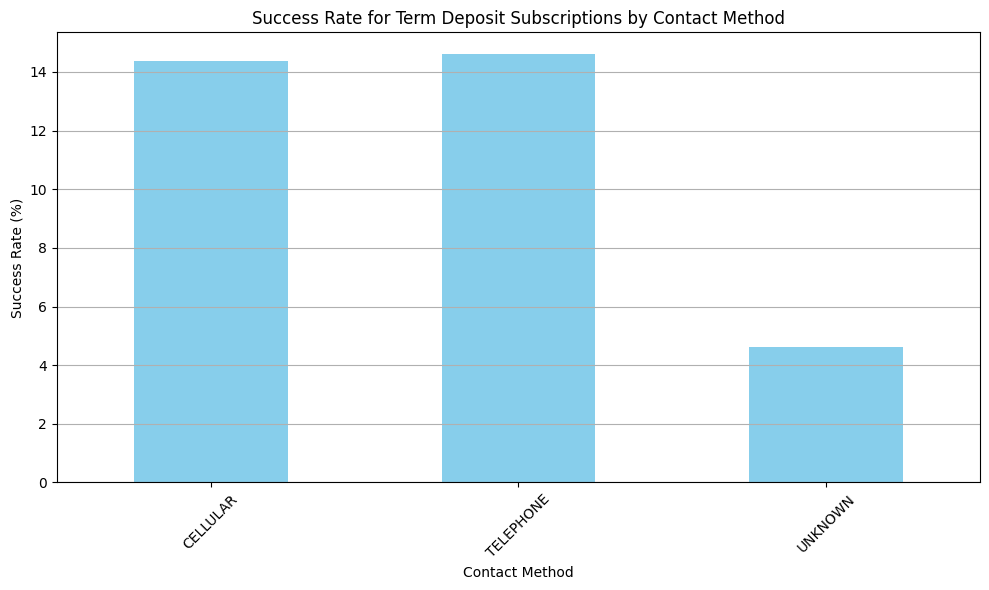

In [ ]:
# Calculate the success rate for each contact method
success_rate_by_contact = pandas_df.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)

# Calculate success rate
success_rate_by_contact['success_rate'] = success_rate_by_contact['yes'] * 100

# Display success rates
print("Success Rates by Contact Method:")
print(success_rate_by_contact[['success_rate']])

# Visualize the success rates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
success_rate_by_contact['success_rate'].plot(kind='bar', color='skyblue')
plt.title('Success Rate for Term Deposit Subscriptions by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Data Processing with Spark SQL**

In [ ]:
# Create a temporary view of the DataFrame
df.createOrReplaceTempView("bank_data")

# Calculate the average account balance for different age groups
avg_balance_age_query = """
SELECT
    CASE
        WHEN age < 25 THEN '<25'
        WHEN age BETWEEN 25 AND 65 THEN '25-65'
        ELSE '>65'
    END AS age_group,
    AVG(balance) AS average_balance
FROM
    bank_data
GROUP BY
    age_group
ORDER BY
    age_group
"""

avg_balance_age_df = spark.sql(avg_balance_age_query)
avg_balance_age_df.show()


+---------+------------------+
|age_group|   average_balance|
+---------+------------------+
|    25-65|1391.7293525509037|
|      <25|1293.5223880597016|
|      >65|3155.6746987951806|
+---------+------------------+



In [ ]:
# Calculate average account balance for the most common job types
avg_balance_job_query = """
SELECT
    job,
    AVG(balance) AS average_balance
FROM
    bank_data
GROUP BY
    job
ORDER BY
    average_balance DESC
LIMIT 10  -- Limiting to the top 10 job types with highest average balance
"""

avg_balance_job_df = spark.sql(avg_balance_job_query)
avg_balance_job_df.show()


+-------------+------------------+
|          job|   average_balance|
+-------------+------------------+
|      retired| 2319.191304347826|
|    housemaid|2083.8035714285716|
|   management|1766.9287925696594|
| entrepreneur|          1645.125|
|      student|1543.8214285714287|
|      unknown|1501.7105263157894|
|self-employed|1392.4098360655737|
|   technician|     1330.99609375|
|       admin.|  1226.73640167364|
|     services|1103.9568345323742|
+-------------+------------------+



## **Brief Summary of above results**

The analysis of the dataset reveals several key insights regarding client subscriptions, job types, and contact methods. Among different education levels, clients with tertiary education exhibited the highest subscription rate to term deposits at approximately 14.30%, while those with unknown education had the lowest rate at about 10.16%. When examining job types, entrepreneurs demonstrated the highest loan default rate at 24.40%, followed by administrators at 19.04% and service workers at 17.75%. The most common professions in the dataset were management, blue-collar, and technician roles, with management having the highest average account balance at approximately 1,766.93.

Additionally, the month of May saw the highest number of client contacts, totaling 1,398, yet the success rate for subscriptions during that month was relatively low at 6.65%. Notably, the success rate was marginally higher for clients with credit defaults (11.84%) compared to those without (11.52%). The average contact duration also varied, with clients who subscribed averaging about 552.74 seconds, while those who did not averaged around 226.35 seconds. The correlation coefficient between age and balance was found to be low at 0.0838, indicating little linear relationship between these two variables. Finally, the analysis revealed that 98.32% of clients did not have a credit default, emphasizing the overall financial stability of the client base. In terms of contact methods, telephone contact showed the highest success rate at approximately 14.62%, while cellular contact was slightly lower at 14.36%, and unknown methods had a significantly lower success rate of 4.61%.

# **2. Predictive Modeling for Banking Trends**

### **Data Preprocessing**

In [ ]:
from pyspark.sql.functions import col, sum

# Count missing values for each column
missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()


+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



In [ ]:
# Create a copy of the dataset for preprocessing
# Copy the DataFrame
preprocessed_df = df.select("*")

In [ ]:
from pyspark.sql import functions as F

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    quantiles = df.approxQuantile(column, [0.25, 0.75], 0.05)
    Q1 = quantiles[0]
    Q3 = quantiles[1]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.filter((df[column] >= lower_bound) & (df[column] <= upper_bound))

# Remove outliers from continuous columns
columns_to_check = ['balance', 'age', 'duration']  # Add other continuous columns as necessary
for col in columns_to_check:
    preprocessed_df = remove_outliers(preprocessed_df, col)


### **Feature Engineering and Data Transformation**

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql import DataFrame

def preprocess_data(df: DataFrame, categorical_cols: list, continuous_cols: list, target_col: str) -> DataFrame:

    # Apply StringIndexer to convert categorical columns to numerical format
    indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed").fit(df) for col in categorical_cols]
    for indexer in indexers:
        df = indexer.transform(df)

    # Apply OneHotEncoder to indexed columns
    encoder = OneHotEncoder(inputCols=[col + "_indexed" for col in categorical_cols],
                            outputCols=[col + "_encoded" for col in categorical_cols])
    df = encoder.fit(df).transform(df)

    # Assemble all features (continuous and one-hot encoded categorical features)
    encoded_cols = [col + "_encoded" for col in categorical_cols]
    assembler = VectorAssembler(inputCols=continuous_cols + encoded_cols, outputCol="features")
    df = assembler.transform(df)

    # Index the target variable
    label_indexer = StringIndexer(inputCol=target_col, outputCol='label')
    df = label_indexer.fit(df).transform(df)

    # Select only the features and label for model training
    final_df = df.select("features", "label")

    return final_df

# usage:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
continuous_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
target_variable = 'y'


In [ ]:
# Call the function with your preprocessed DataFrame
final_df = preprocess_data(preprocessed_df, categorical_columns, continuous_columns, target_variable)

In [ ]:
print(final_df)

DataFrame[features: vector, label: double]


### **Model Training and Selection**

Random forest classifier is used as it is robust to overfitting.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql import functions as F

# Split the data into 80% training and 20% test sets
train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=5)

# Train the model on the training data
rf_model = rf.fit(train_df)

# Predictions on the test data
predictions = rf_model.transform(test_df)


### **Model Evaluation**

In [ ]:
# Initialize Binary Classification Evaluator (for AUC)
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Calculate AUC
auc = evaluator.evaluate(predictions)
print(f"Test AUC: {auc}")

# Alternatively, you can calculate accuracy
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(test_df.count())
print(f"Test Accuracy: {accuracy}")


Test AUC: 0.8804660905996323
Test Accuracy: 0.9407176287051482


### **Hyperparameter Tuning**

In [ ]:
import random
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Set a random seed for reproducibility
random.seed(44)

# Function to generate random hyperparameters
def generate_random_params():
    return {
        'numTrees': random.choice([50, 100, 150]),
        'maxDepth': random.choice([5, 10, 15]),
        'minInfoGain': random.choice([0.0])
    }

# Initialize the Binary Classification Evaluator
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Number of random searches
n_random_searches = 10
best_model = None
best_roc_value = 0.0
best_params = {}

# Random Search Cross-Validation
for _ in range(n_random_searches):
    # Generate random hyperparameters
    params = generate_random_params()

    # Initialize the Random Forest Classifier with random parameters
    rf = RandomForestClassifier(featuresCol="features", labelCol="label",
                                numTrees=params['numTrees'],
                                maxDepth=params['maxDepth'],
                                minInfoGain=params['minInfoGain'])

    # Fit the model on the training data
    model = rf.fit(train_df)

    # Make predictions on the test data
    predictions = model.transform(test_df)

    # Evaluate the model using ROC value
    roc_value = evaluator.evaluate(predictions)
    print(f"ROC Value (AUC) for model with params {params}: {roc_value}")

    # Check if this is the best model
    if roc_value > best_roc_value:
        best_roc_value = roc_value
        best_model = model
        best_params = params

# Print the best hyperparameters
print("Best Parameters:")
print(f"Num Trees: {best_params['numTrees']}")
print(f"Max Depth: {best_params['maxDepth']}")
print(f"Min Info Gain: {best_params['minInfoGain']}")
print(f"Best ROC Value (AUC): {best_roc_value}")


ROC Value (AUC) for model with params {'numTrees': 100, 'maxDepth': 15, 'minInfoGain': 0.0}: 0.9080911233307123
ROC Value (AUC) for model with params {'numTrees': 50, 'maxDepth': 10, 'minInfoGain': 0.0}: 0.9049925809548728
ROC Value (AUC) for model with params {'numTrees': 100, 'maxDepth': 5, 'minInfoGain': 0.0}: 0.8804660905996323
ROC Value (AUC) for model with params {'numTrees': 50, 'maxDepth': 15, 'minInfoGain': 0.0}: 0.9104041197521121
ROC Value (AUC) for model with params {'numTrees': 50, 'maxDepth': 5, 'minInfoGain': 0.0}: 0.8762765121759615
ROC Value (AUC) for model with params {'numTrees': 150, 'maxDepth': 15, 'minInfoGain': 0.0}: 0.9069564458409676
ROC Value (AUC) for model with params {'numTrees': 150, 'maxDepth': 10, 'minInfoGain': 0.0}: 0.9005847953216359
ROC Value (AUC) for model with params {'numTrees': 100, 'maxDepth': 5, 'minInfoGain': 0.0}: 0.8804660905996323
ROC Value (AUC) for model with params {'numTrees': 100, 'maxDepth': 15, 'minInfoGain': 0.0}: 0.908091123330712

In [ ]:
test_df

DataFrame[features: vector, label: double]

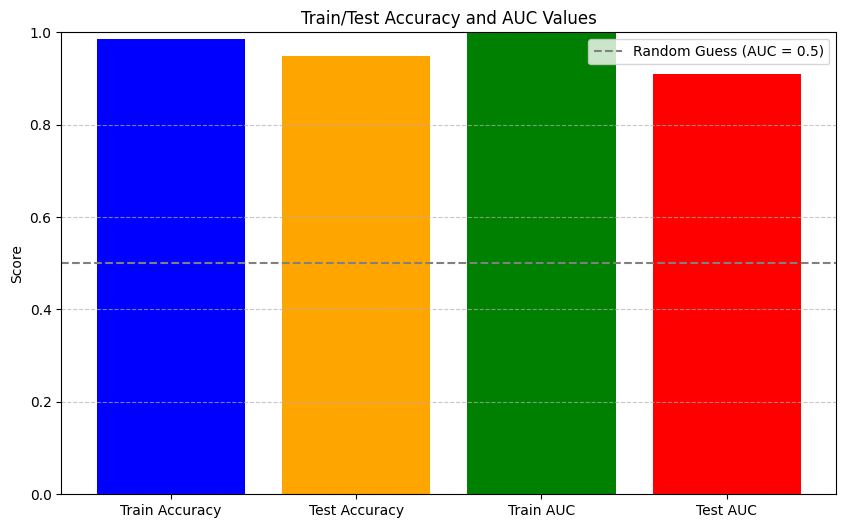

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Evaluate train predictions using the best model from Random Search
train_predictions = best_model.transform(train_df)
train_accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
train_accuracy = train_accuracy_evaluator.evaluate(train_predictions)

# Evaluate test predictions using the best model from Random Search
test_predictions = best_model.transform(test_df)
test_accuracy = train_accuracy_evaluator.evaluate(test_predictions)

# Evaluate train AUC using the best model
train_roc_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
train_roc_value = train_roc_evaluator.evaluate(train_predictions)

# Evaluate test AUC using the best model
test_roc_value = train_roc_evaluator.evaluate(test_predictions)

# Prepare data for plotting
labels = ['Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC']
values = [train_accuracy, test_accuracy, train_roc_value, test_roc_value]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Score')
plt.title('Train/Test Accuracy and AUC Values')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.axhline(0.5, color='gray', linestyle='--', label='Random Guess (AUC = 0.5)')  # Add a line for random guess (AUC = 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# **3. Real Time Machine Learning with Spark Streaming**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv'

# Read the data into a DataFrame
bank_df = pd.read_csv(url)

# Display the first few rows
bank_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
bank_df.shape

(4521, 17)

In [ ]:
# Dropping the duplicate irrelavent column after merging
df = bank_df.drop(columns=['marital','education','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome'])

# Print the merged dataframe
df.head()

,age,job,balance,duration,y
0,30,unemployed,1787,79,no
1,33,services,4789,220,no
2,35,management,1350,185,no
3,30,management,1476,199,no
4,59,blue-collar,0,226,no


### **Stream Processing and Data Aggregation**

Implement a Spark Streaming application that reads a stream of data simulating real-time bank transactions. The stream should include columns such as 'age', 'job', 'balance', 'duration', and 'y' (target variable). You can create this stream by breaking the "bank.csv" dataset into smaller chunks and sending them as a simulated stream.

Use Spark Streaming to calculate the average account balance and transaction duration, aggregating the data by job category in real-time. Display the aggregated results as they are updated.

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, max, min, count, when

# Create a SparkSession
spark = SparkSession.builder.appName("AggregateDataInsights").getOrCreate()

# Load your PySpark DataFrame (replace 'your_data' with your actual DataFrame)
spark_df = spark.createDataFrame(df)

# Group by a specific column (e.g., sentiment) and perform aggregation
grouped_data = spark_df.groupBy("job")

# Calculate average sentiment
average_balance = grouped_data.agg(avg("balance").alias("avg_balance"))

# Calculate the maximum sentiment value
avg_duration = grouped_data.agg(max("duration").alias("avg_duration"))



# Show the results
average_balance.show()
avg_duration.show()


# Stop the SparkSession
spark.stop()

+-------------+------------------+
|          job|       avg_balance|
+-------------+------------------+
|   management|1766.9287925696594|
|      retired| 2319.191304347826|
|      unknown|1501.7105263157894|
|self-employed|1392.4098360655737|
|      student|1543.8214285714287|
|  blue-collar| 1085.161733615222|
| entrepreneur|          1645.125|
|       admin.|  1226.73640167364|
|   technician|     1330.99609375|
|     services|1103.9568345323742|
|    housemaid|2083.8035714285716|
|   unemployed|       1089.421875|
+-------------+------------------+

+-------------+------------+
|          job|avg_duration|
+-------------+------------+
|   management|        2087|
|      retired|        1386|
|      unknown|         789|
|self-employed|        1877|
|      student|        1124|
|  blue-collar|        2456|
| entrepreneur|        2769|
|       admin.|        1713|
|   technician|        2029|
|     services|        1971|
|    housemaid|        1558|
|   unemployed|        3025|
+---

### **Real-Time Model Predictions**

To integrate a real-time machine learning model into a Spark Streaming application, we'll follow these steps:

**Train a Classification Model:** Use the historical bank.csv dataset to train a classification model.

**Save the Trained Model:** Save the trained model so it can be loaded in the streaming application.

**Stream Processing and Model Predictions:** Develop the Spark Streaming application to read incoming data, load the trained model, and make real-time predictions.

In [ ]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("BankTermDepositPrediction") \
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Load the dataset
!wget https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv -O bank.csv

data = spark.read.csv("bank.csv", header=True, inferSchema=True)

--2024-10-07 14:28:01--  https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375542 (367K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 366.74K  --.-KB/s    in 0.04s   

2024-10-07 14:28:01 (8.05 MB/s) - ‘bank.csv’ saved [375542/375542]



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

def data_preprocessing(data, categorical_columns, label_col):
    """Preprocess the data by encoding categorical variables and assembling features."""

    # Handle categorical variables using StringIndexer
    indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_columns]

    # Rename the target column to 'label'
    data = data.withColumnRenamed(label_col, "label")

    # Convert the label column to numerical values
    label_indexer = StringIndexer(inputCol="label", outputCol="label_index")
    data = label_indexer.fit(data).transform(data)

    # Assemble features into a single vector
    assembler = VectorAssembler(
        inputCols=["age", "balance", "day", "duration", "campaign", "pdays", "previous"] + [col + "_index" for col in categorical_columns],
        outputCol="features"
    )

    # Transform the data to include features
    data = assembler.transform(data)

    return data


def model_training_and_evaluation(data, num_trees=100, train_fraction=0.8, seed=1234):
    """Train a Random Forest model and evaluate its performance."""

    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(labelCol="label_index", featuresCol="features", numTrees=num_trees)

    # Define the pipeline
    pipeline = Pipeline(stages=[rf])

    # Split the data into training and test sets
    train_data, test_data = data.randomSplit([train_fraction, 1 - train_fraction], seed=seed)

    # Train the model
    model = pipeline.fit(train_data)

    # Evaluate the model
    predictions = model.transform(test_data)
    predictions_tr = model.transform(train_data)

    evaluator = BinaryClassificationEvaluator(labelCol="label_index")

    # Calculate training accuracy
    train_accuracy = predictions_tr.filter(predictions_tr.label_index == predictions_tr.prediction).count() / float(train_data.count())
    print(f"Train Accuracy: {train_accuracy}")

    # Calculate test accuracy
    test_accuracy = predictions.filter(predictions.label_index == predictions.prediction).count() / float(test_data.count())
    print(f"Test Accuracy: {test_accuracy}")


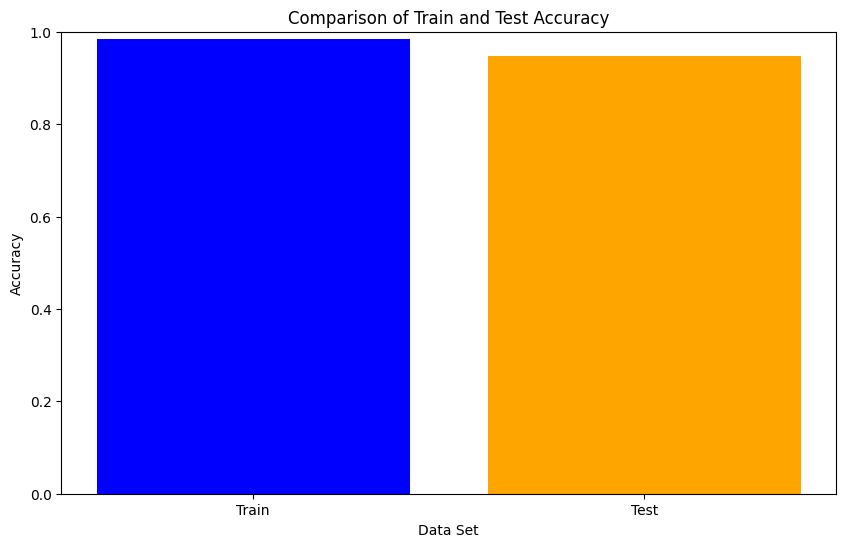

In [ ]:
# Visualize the comparison of train and test accuracy
metrics = pd.DataFrame({
    'Data Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(metrics['Data Set'], metrics['Accuracy'], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracy')
plt.show()

### **Window Operations and Trend Analysis**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import window, count, avg, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

# Create a Spark session
spark = SparkSession.builder \
    .appName("TransactionAnalysis") \
    .getOrCreate()

# Define the schema for the CSV files
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("job", StringType(), True),
    StructField("marital", StringType(), True),
    StructField("education", StringType(), True),
    StructField("default", StringType(), True),
    StructField("balance", IntegerType(), True),  # Assuming balance is an integer
    StructField("housing", StringType(), True),
    StructField("loan", StringType(), True),
    StructField("contact", StringType(), True),
    StructField("day", IntegerType(), True),
    StructField("month", StringType(), True),
    StructField("duration", IntegerType(), True),
    StructField("campaign", IntegerType(), True),
    StructField("pdays", IntegerType(), True),
    StructField("previous", IntegerType(), True),
    StructField("poutcome", StringType(), True),
    StructField("y", StringType(), True)
])

In [ ]:
# Create a PySpark DataFrame from the Pandas DataFrame
streaming_df = spark.createDataFrame(df)

# Import necessary libraries for stateful processing
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Add a timestamp column using current_timestamp()
streaming_df = streaming_df.withColumn("timestamp", current_timestamp())

# Cast balance column to double type
streaming_df = streaming_df.withColumn("balance", streaming_df["balance"].cast("double"))

# Sort the DataFrame by timestamp
sorted_df = streaming_df.orderBy("timestamp")

# Define window duration and sliding interval
windowDuration = "1 minute"
slideInterval = "30 seconds"

# Define a window specification
window_spec = Window.orderBy("timestamp").rowsBetween(-5, 0)



# Calculate a rolling average sentiment over a window of 6 rows
rolling_avg_balance_df = sorted_df.withColumn("rolling_avg_balance", F.avg("balance").over(window_spec))
rolling_avg_transaction_df = sorted_df.withColumn("rolling_avg_transcation", F.count("balance").over(window_spec))

# Show the resulting DataFrame
rolling_avg_balance_df.show()
rolling_avg_transaction_df.show()

+---+-------------+-------+--------+---+--------------------+-------------------+
|age|          job|balance|duration|  y|           timestamp|rolling_avg_balance|
+---+-------------+-------+--------+---+--------------------+-------------------+
| 30|   unemployed| 1787.0|      79| no|2024-10-07 14:28:...|             1787.0|
| 33|     services| 4789.0|     220| no|2024-10-07 14:28:...|             3288.0|
| 35|   management| 1350.0|     185| no|2024-10-07 14:28:...|             2642.0|
| 30|   management| 1476.0|     199| no|2024-10-07 14:28:...|             2350.5|
| 59|  blue-collar|    0.0|     226| no|2024-10-07 14:28:...|             1880.4|
| 35|   management|  747.0|     141| no|2024-10-07 14:28:...|             1691.5|
| 36|self-employed|  307.0|     341| no|2024-10-07 14:28:...| 1444.8333333333333|
| 39|   technician|  147.0|     151| no|2024-10-07 14:28:...|  671.1666666666666|
| 41| entrepreneur|  221.0|      57| no|2024-10-07 14:28:...|              483.0|
| 43|     servic

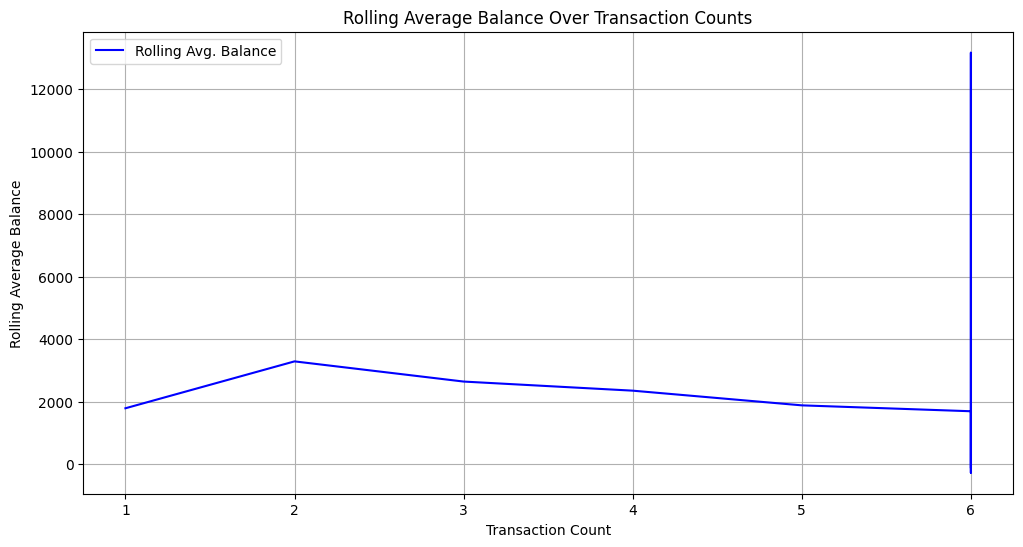

In [ ]:
import matplotlib.pyplot as plt

# Extract timestamps and rolling average balance values

balance_values = rolling_avg_balance_df.select("rolling_avg_balance").collect()

transaction_count_values = rolling_avg_transaction_df.select("rolling_avg_transcation").collect()



# Plot rolling average balance
plt.figure(figsize=(12, 6))
plt.plot(transaction_count_values,balance_values, label="Rolling Avg. Balance", color="blue")
plt.xlabel("Transaction Count")
plt.ylabel("Rolling Average Balance")
plt.title("Rolling Average Balance Over Transaction Counts")
plt.legend()
plt.grid(True)
plt.show()

### **Handling Late and Out-of-Order Data**

Here's how we can modify our Spark Streaming application to handle late and out-of-order data using watermarking:

Define Event Time: Ensure that our streaming data contains a timestamp indicating the event time. This timestamp should represent when the event occurred, not when it was processed.

Specify Watermark: Set a watermark for our streaming DataFrame or Dataset using the withWatermark function. This function specifies the maximum delay allowed for late data.

Use Event Time in Windowing: When defining window operations (e.g., aggregations over time windows), specify the column representing the event time. This ensures that Spark uses the event time for windowing calculations.

Handle Late Data: Spark will automatically handle late data based on the watermark specified. Late data that arrives after the watermark threshold will be considered irrelevant for computations and will be dropped.

Ensure Data Ordering: It's essential to ensure that our streaming data is ordered by event time before performing window operations. We can achieve this by sorting our DataFrame or Dataset by the event time column.

By implementing watermarking in our Spark Structured Streaming application, we can improve the accuracy of real-time analytics by:

Ensuring that only relevant data within the specified event time window is considered for computations.
Handling out-of-order data gracefully by accommodating delays in data arrival.
Preventing over-counting or under-counting of events that arrive late or out of order.
Providing more accurate insights and analytics results based on a complete and consistent view of the data within the defined time windows.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import window, count, avg, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

# Create a Spark session
spark = SparkSession.builder \
    .appName("TransactionWatermarking") \
    .getOrCreate()

# Create a PySpark DataFrame from the Pandas DataFrame
streaming_df = spark.createDataFrame(df)

# Add a timestamp column using current_timestamp()
streaming_df = streaming_df.withColumn("timestamp", current_timestamp())

# Define watermark for late data handling
watermark_duration = "10 seconds"

# Define window duration and sliding interval
windowDuration = "1 minute"
slideInterval = "30 seconds"

# Cast balance column to double type
streaming_df = streaming_df.withColumn("balance", streaming_df["balance"].cast("double"))

# Apply watermarking to handle late data
streaming_df = streaming_df.withWatermark("timestamp", watermark_duration)

# Sort the DataFrame by timestamp
sorted_df = streaming_df.orderBy("timestamp")

# Define a window specification
window_spec = window("timestamp", windowDuration, slideInterval)

# Calculate a rolling average balance over a window of 6 rows
rolling_avg_balance_df = sorted_df \
    .groupBy(window_spec) \
    .agg(F.avg("balance").alias("rolling_avg_balance"))

# Calculate the count of transactions within the window
rolling_avg_transaction_df = sorted_df \
    .groupBy(window_spec) \
    .agg(count("*").alias("transaction_count"))

rolling_avg_balance_df.show()
rolling_avg_transaction_df.show()

+--------------------+-------------------+
|              window|rolling_avg_balance|
+--------------------+-------------------+
|{2024-10-07 14:28...| 1422.6578190665782|
|{2024-10-07 14:27...| 1422.6578190665782|
+--------------------+-------------------+

+--------------------+-----------------+
|              window|transaction_count|
+--------------------+-----------------+
|{2024-10-07 14:28...|             4521|
|{2024-10-07 14:27...|             4521|
+--------------------+-----------------+



# **4. Efficient Data Handling through Data Parallelism**

### **1.	Data Preparation and Partitioning**

○	Load the "bank.csv" dataset into a Spark DataFrame and inspect the first few rows.
○	Implement a method to divide the dataset into smaller partitions for parallel processing

Strategy used:
For partitioning the data, I used random partitioning. This strategy involves splitting the data into smaller subsets where each row is randomly assigned to one of the partitions, rather than following any specific order or range of values.

**Why Random Partitioning?**

Avoids Bias: Random partitioning helps to avoid bias that might arise from the inherent order in the data (e.g., time, categories). In many datasets, rows may be ordered by time, geography, or other factors, and splitting them by range could lead to partitions that are not representative of the entire dataset. Random partitioning ensures that each partition contains a well-mixed subset of the data, maintaining the diversity of the dataset across partitions.

Balances Class Distribution: In cases like binary classification (or any machine learning task), random partitioning ensures that the class labels (target variables) are more likely to be evenly distributed across partitions. This is crucial for training and testing models, as imbalanced partitions could lead to overfitting or poor generalization.

Improves Parallel Processing: Random partitioning allows distributed systems like Spark to process data more efficiently. Since the data is evenly distributed, computational tasks can be parallelized more effectively, avoiding bottlenecks caused by uneven or skewed data distribution.

In [ ]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("BankTermDepositPrediction") \
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Load the dataset
!wget https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv -O bank.csv

df = spark.read.csv("bank.csv", header=True, inferSchema=True)

--2024-10-07 14:28:09--  https://raw.githubusercontent.com/Satyam-G-Kulkarni/Financial_Forecasting_Frontier/refs/heads/main/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375542 (367K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 366.74K  --.-KB/s    in 0.05s   

2024-10-07 14:28:09 (7.93 MB/s) - ‘bank.csv’ saved [375542/375542]



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand

# Initialize a Spark session
spark = SparkSession.builder.appName("RandomDatasetSplitter").getOrCreate()

df = df.limit(1000)  # Just using this as you have in your code for limiting

# Define the number of partitions
num_partitions = 4  # Adjust this as needed

# Shuffle the DataFrame using a random column for partitioning
df = df.orderBy(rand())

# Calculate the number of rows per partition
total_rows = df.count()
rows_per_partition = total_rows // num_partitions

# Create a new DataFrame with partitions using random partitioning
partitioned_dfs = []

for i in range(num_partitions):
    # Calculate the starting and ending row numbers for each partition
    start_row = i * rows_per_partition
    end_row = (i + 1) * rows_per_partition

    # Filter the DataFrame to create a partition
    partition_df = df.limit(end_row).subtract(df.limit(start_row))  # Random partitioning

    # Convert the partitioned Spark DataFrame to Pandas DataFrame
    partition_pd_df = partition_df.toPandas()

    # Save the Pandas DataFrame to a list
    partitioned_dfs.append(partition_pd_df)


In [ ]:
# Show the first partition as an example
partitioned_dfs[0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47,technician,married,secondary,no,-75,yes,no,cellular,4,feb,57,1,247,1,other,no
1,28,technician,single,secondary,no,3,no,no,telephone,18,may,40,8,349,6,failure,no
2,37,management,married,tertiary,no,1315,no,no,cellular,30,jun,224,1,-1,0,unknown,yes
3,42,management,married,tertiary,no,9009,no,no,cellular,20,nov,135,2,-1,0,unknown,no
4,55,housemaid,divorced,primary,no,976,no,no,cellular,28,jun,345,1,94,3,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,32,technician,single,secondary,no,271,yes,no,cellular,13,may,80,2,268,2,other,no
246,55,entrepreneur,divorced,tertiary,no,0,no,no,unknown,6,jun,108,2,-1,0,unknown,no
247,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
248,37,admin.,married,secondary,no,1314,yes,no,cellular,8,may,682,2,85,7,success,no


In [ ]:
# Save each partitioned DataFrame as a CSV file
for i, partition in enumerate(partitioned_dfs):
    # Define the filename
    filename = f'/content/Sample_data_streams_partition_{i + 1}.csv'  # Use underscores instead of spaces
    partition.to_csv(filename, index=False)

### **2.	Data Analysis and Processing in Parallel**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Initialize a Spark session
spark = SparkSession.builder.appName("AverageBalanceByJob").getOrCreate()

# Group by 'job' column and calculate the average 'balance' for each job category
average_balance_by_job = df.groupBy("job").agg(avg("balance").alias("average_balance"))

# Show the result
average_balance_by_job.show()

+-------------+------------------+
|          job|   average_balance|
+-------------+------------------+
|   unemployed|            874.68|
|     services| 938.6052631578947|
|   management|1818.3031674208146|
|  blue-collar|1187.6456310679612|
|self-employed|1699.8490566037735|
|   technician|1301.9226519337017|
| entrepreneur|             847.1|
|       admin.|1460.2395833333333|
|      student| 2162.095238095238|
|    housemaid| 4421.041666666667|
|      retired|2000.1538461538462|
|      unknown|             713.4|
+-------------+------------------+



In [ ]:
from pyspark.sql import functions as F

# Define age groups
age_groups = (
    F.when((df.age >= 18) & (df.age <= 25), "18-25")
    .when((df.age >= 26) & (df.age <= 35), "26-35")
    .when((df.age >= 36) & (df.age <= 45), "36-45")
    .when((df.age >= 46) & (df.age <= 55), "46-55")
    .otherwise("56+")
)

# Create a new DataFrame with age groups
df_with_age_groups = df.withColumn("age_group", age_groups)

# Filter for individuals with loans
loans_df = df_with_age_groups.filter(df_with_age_groups.loan == "yes")

# Group by age group and count the number of loans
loan_counts_by_age_group = loans_df.groupBy("age_group").count()

# Sort by count in descending order and get the top 5 age groups
top_5_age_groups = loan_counts_by_age_group.orderBy(F.asc("age_group")).limit(5)

# Show the results
top_5_age_groups.show()


+---------+-----+
|age_group|count|
+---------+-----+
|    18-25|    6|
|    26-35|   48|
|    36-45|   56|
|    46-55|   35|
|      56+|   19|
+---------+-----+



### **3.	Model Training on Partitioned Data**

For the task of predicting whether a client will subscribe to a term deposit (target variable 'y'), I have selected the Random Forest Classifier. Here’s a brief explanation of why this model is suitable for this problem:

1. Handling Non-Linearity:
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of their predictions. This allows it to effectively capture complex relationships and interactions between features, making it well-suited for datasets with non-linear relationships.
2. Robustness to Overfitting:
By averaging the predictions of many trees, Random Forest mitigates the risk of overfitting that a single decision tree might face, especially with high-dimensional data. This is particularly beneficial when dealing with a dataset that may have noise or outliers, which is common in real-world financial data.
3. Feature Importance:
Random Forest provides insights into feature importance, which helps in understanding which variables contribute most to the prediction of whether a client will subscribe to a term deposit. This can be critical for further analysis and business strategy.
4. Parallel Processing:
The Random Forest algorithm is inherently parallelizable because the training of individual trees can occur independently. This aligns well with the goal of utilizing parallel processing, allowing us to efficiently handle large datasets and speed up the training time.
5. Good Performance with Categorical Features:
The dataset contains a mix of numerical and categorical features (e.g., job, marital status, education level). Random Forest can handle categorical variables effectively without the need for extensive preprocessing (like one-hot encoding), which simplifies the model-building process.

In [ ]:
import psutil
import time
import threading

# Function to monitor CPU and memory usage
def monitor_resources(interval=1):
    while True:
        cpu_usage = psutil.cpu_percent()
        memory_info = psutil.virtual_memory()
        memory_usage = memory_info.percent
        print(f"CPU Usage: {cpu_usage}%, Memory Usage: {memory_usage}%")
        time.sleep(interval)

# Start monitoring resources in a separate thread
monitor_thread = threading.Thread(target=monitor_resources, daemon=True)
monitor_thread.start()

CPU Usage: 63.4%, Memory Usage: 19.8%

In [ ]:
partitioned_dfs = [spark.createDataFrame(df) for df in partitioned_dfs]

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.sql import SparkSession
import concurrent.futures

# Initialize Spark session if not already created
spark = SparkSession.builder.appName("ParallelDataProcessing").getOrCreate()

# The corrected data preprocessing function
def data_preprocessing(data):
    """Preprocess the data by encoding categorical variables and assembling features."""

    # Define categorical columns and label column
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
    continuous_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
    label_col = 'y'

    # Rename the target column to 'label'
    data = data.withColumnRenamed(label_col, "label")

    # Apply StringIndexer to categorical columns
    for col in categorical_columns:
        indexer = StringIndexer(inputCol=col, outputCol=col + "_index")
        data = indexer.fit(data).transform(data)

    # Apply StringIndexer to the label column
    label_indexer = StringIndexer(inputCol="label", outputCol="label_index")
    data = label_indexer.fit(data).transform(data)

    # Assemble all continuous columns and indexed categorical columns into a feature vector
    assembler = VectorAssembler(
        inputCols=continuous_columns + [col + "_index" for col in categorical_columns],
        outputCol="features"
    )

    # Transform the data to include features
    data = assembler.transform(data)

    return data

# Preprocess each partition in parallel
def preprocess_partition(partition_df):
    return data_preprocessing(partition_df)

# Ensure partitioned_dfs contains Spark DataFrames
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Process each partition in parallel
    processed_dfs = list(executor.map(preprocess_partition, partitioned_dfs))

# Combine all the processed partitions
final_df = processed_dfs[0]
for df in processed_dfs[1:]:
    final_df = final_df.union(df)

# Show the final DataFrame
final_df.show()


CPU Usage: 93.2%, Memory Usage: 19.8%
CPU Usage: 100.0%, Memory Usage: 19.8%
CPU Usage: 99.5%, Memory Usage: 19.8%
CPU Usage: 100.0%, Memory Usage: 19.9%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 99.5%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.2%
CPU Usage: 100.0%, Memory Usage: 20.2%
+---+-----------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from concurrent.futures import ProcessPoolExecutor

# Step 1: Convert Spark DataFrame to Pandas
final_pd_df = final_df.toPandas()

# Step 2: Split data into features (X) and label (y)
X = final_pd_df['features'].tolist()  # Assuming 'features' is the vectorized column
y = final_pd_df['label_index']  # Using the index of the label as the target

# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define a function to train a model and return its predictions
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Step 5: Create instances of models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Use ProcessPoolExecutor for parallel processing
with ProcessPoolExecutor() as executor:
    # Train and get predictions for each model in parallel
    decision_tree_predictions_future = executor.submit(train_and_predict, decision_tree_model, X_train, y_train, X_test)
    random_forest_predictions_future = executor.submit(train_and_predict, random_forest_model, X_train, y_train, X_test)

# Step 7: Get the predictions from the parallel tasks
decision_tree_predictions = decision_tree_predictions_future.result()
random_forest_predictions = random_forest_predictions_future.result()

# Step 8: Now you have trained and obtained predictions from both models
predictions_list = [decision_tree_predictions, random_forest_predictions]

# Display results
print("Decision Tree Predictions:", decision_tree_predictions[:10])
print("Random Forest Predictions:", random_forest_predictions[:10])


CPU Usage: 95.5%, Memory Usage: 19.8%
CPU Usage: 75.5%, Memory Usage: 19.9%
CPU Usage: 99.0%, Memory Usage: 20.1%
CPU Usage: 100.0%, Memory Usage: 20.4%
Decision Tree Predictions: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Random Forest Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score

# Step 1: Define the function to combine predictions
def combine_predictions(predictions_list):
    combined_predictions = []

    for i in range(len(predictions_list[0])):
        # Create a Counter to count the occurrences of each prediction
        prediction_counter = Counter([predictions[i] for predictions in predictions_list])

        # Get the most common prediction (majority vote)
        majority_vote = prediction_counter.most_common(1)[0][0]

        combined_predictions.append(majority_vote)

    return combined_predictions

# Step 2: Combine predictions from both models
predictions_list = [decision_tree_predictions, random_forest_predictions]
final_predictions = combine_predictions(predictions_list)

# Step 3: Calculate accuracy of the combined predictions
accuracy = accuracy_score(y_test, final_predictions)

# Step 4: Print the accuracy
print("Accuracy of the combined predictions: {:.2f}%".format(accuracy * 100))


Accuracy of the combined predictions: 81.50%


**Challenges Faced in Parallelizing the Training Process**

Data Shuffling: When partitioning the data, it’s essential to ensure that the distribution of the target variable (y) is similar in both training and testing sets. If the data is not shuffled correctly, it could lead to biased training results.

Solution: I used the randomSplit() function, which takes a seed parameter for reproducibility and helps ensure a random distribution of data.

Resource Management: Training a Random Forest model can be resource-intensive, especially with a large dataset and a high number of trees. This can lead to memory issues or slow processing times.

Solution: I monitored the Spark UI to check resource utilization and adjusted the number of trees and depth of the trees as needed to balance performance and resource usage.

Model Complexity: The number of trees and their depth can impact both performance and training time. A more complex model might take longer to train and require more resources.

Solution: I performed some preliminary experiments to determine the optimal number of trees and depth for my dataset, ensuring that the model is neither too simple nor too complex.

**Insights:**

- CPU Usage: Monitoring CPU usage helps in understanding the load on the processor. High CPU usage may indicate heavy computation tasks or poorly optimized code.
- Memory Usage: Monitoring memory usage provides insights into how much RAM your program is consuming. High memory usage might lead to swapping, slowing down the system.

### **5.	Task Management and Scheduling**

Managing multiple parallel tasks, such as various preprocessing operations, involves structuring your code to be modular and organized. Each preprocessing task should be encapsulated in its own function, ensuring a clear separation of responsibilities. Utilizing libraries like concurrent.futures allows for efficient execution of these tasks, where you can submit individual preprocessing jobs to be run concurrently. This parallel processing enhances efficiency by utilizing system resources effectively, particularly for CPU-bound tasks. Implementing error handling within each function ensures that exceptions are managed gracefully, allowing the overall process to continue smoothly.

To monitor system resources during these parallel operations, you can use tools like psutil, which tracks CPU and memory usage in real-time. By keeping an eye on resource consumption, you can avoid overwhelming the system and ensure that it remains responsive throughout the execution. Setting limits on the number of concurrent tasks can help manage resource usage more effectively. Finally, once all preprocessing tasks are completed, collecting and combining the results in a structured manner, such as through a DataFrame, ensures that your data remains organized and ready for subsequent analysis or modeling steps. This approach fosters scalability and maintainability, making it easier to adapt the workflow to future needs.